# Ballistic Trajectories

## 1) Basic Equations

$$ 
y(t) = (v_o \sin \theta) t  - 0.5gt^2
$$

$$ 
x(t) = (v_o \cos \theta) t
$$


$$ 
y(x) = (\tan \theta)x - \frac{g}{2(v_o \cos \theta)^2}x^2
$$


Time to reach the initial point in $y_0$:


$$
t_{end} = \frac{2(v_0 \sin \theta)}{g}
$$



$R$ is the horizontal range, and $y_{max}$ is the maximum height, hence: 


$$ 
R = \frac{{v_o}^2}{g}\sin 2 \theta
$$

$$
y_{max} = \frac{{v_o}^2}{2g}(\sin\theta)^2
$$

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
import warnings
warnings.filterwarnings("ignore")

### Constants

In [2]:
G = 9.8
thrown_ball_vo = 42 # m/s
mortar_vo = 110 # m/s

### Functions

In [3]:
def d2r(theta):
    return math.radians(theta)

def r2d(theta):
    return math.degrees(theta)

def yt(t, theta, vo):
    car = vo*np.sin(d2r(theta))*t
    cdr = 0.5*G*np.power(t,2)
    return car - cdr


def xt(t, theta, vo):
    car = vo*np.cos(d2r(theta))*t
    return car


def y(x, theta, vo):
    car = np.tan(d2r(theta))*x
    num = G*np.power(x,2)
    dem = 2*np.power(vo*np.cos(d2r(theta)),2)
    cdr = num/dem
    return car - cdr


def time2yo(theta, vo):
    num = 2*vo*np.sin(d2r(theta))
    dem = G
    return num/dem


def R(theta, vo):
    car = np.power(vo,2)*np.sin(d2r(2*theta))
    return car/G

def ymax(theta, vo):
    car = np.power(vo,2)*np.power(np.sin(d2r(theta)),2)
    return car/(2*G)


def run_exp(theta, vo, num_t):
    end_t = time2yo(theta=theta, vo=vo)
    R_exp = R(theta=theta, vo=vo)
    ymax_exp = ymax(theta=theta, vo=vo)
    ts = np.linspace(0,end_t,num_t)
    xs = []
    ys = []
    for t in ts:
        x_t = xt(t, theta=theta, vo=vo)
        y_x = y(x_t, theta=theta, vo=vo)
        xs.append(x_t)
        ys.append(y_x)
    obs = np.array([ts,xs,ys]).T
    df = pd.DataFrame(obs, columns=["t", "x", "y"])
    df["t_final"] = end_t
    df["R"] = R_exp
    df["y_max"] = ymax_exp
    return df

### Experiment

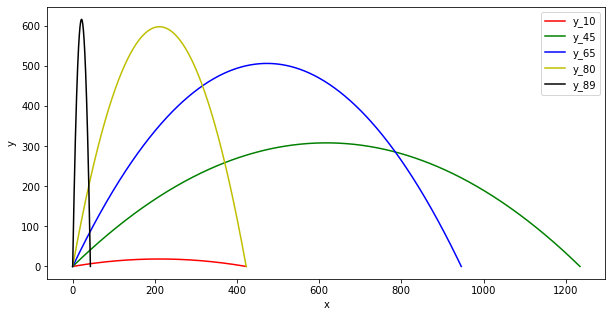

In [4]:
theta1 = 10
theta2 = 45
theta3 = 65
theta4 = 80
theta5 = 89
num_t = 600
v0 = mortar_vo

exp1 = run_exp(theta=theta1, vo=v0, num_t=num_t)
exp2 = run_exp(theta=theta2, vo=v0, num_t=num_t)
exp3 = run_exp(theta=theta3, vo=v0, num_t=num_t)
exp4 = run_exp(theta=theta4, vo=v0, num_t=num_t)
exp5 = run_exp(theta=theta5, vo=v0, num_t=num_t)

thetas = [theta1, theta2, theta3, theta4, theta5]
exps = [exp1, exp2, exp3, exp4, exp5]
colors = ["r", "g", "b", "y", "k"]
figsize=(10, 5)
fig, ax = plt.subplots(figsize=figsize)

for theta,exp,c in zip(thetas,exps, colors):
    suf = "_{}".format(theta)
    exp.add_suffix(suf).set_index("x"+suf)[["y"+suf]].plot(ax=ax, color=c);
plt.xlabel('x');
plt.ylabel('y');

### Consistency checks

In [5]:
for i,exp in enumerate(exps):
    y_check = np.abs(exp["y"].max() - exp["y_max"].mean())
    R_check = np.abs(exp["x"].iloc[-1] - exp["R"].mean())
    print("Exp {}\nymax_check={:.5f}\nR_check={:.5f}\n".format(i+1, y_check,R_check))


Exp 1
ymax_check=0.00005
R_check=0.00000

Exp 2
ymax_check=0.00086
R_check=0.00000

Exp 3
ymax_check=0.00141
R_check=0.00000

Exp 4
ymax_check=0.00167
R_check=0.00000

Exp 5
ymax_check=0.00172
R_check=0.00000



## 2) Given $R$ and $v_0$ we can find the angle $\theta$ to hit a target in the $x$ axis

$$ 
\theta = 0.5* \arcsin \left(\frac{Rg}{{v_o}^2}\right)
$$


In [6]:
def get_theta_R(R,v0):
    round_value = np.round((R*G)/np.power(v0,2),5)
    return 0.5*math.degrees(np.arcsin(round_value))

v0 = mortar_vo
target_x = 824.125

theta = get_theta_R(target_x,v0)
exp = run_exp(theta=theta, vo=v0, num_t=num_t)

print("target = {:.2f}m | theta = {:.2f} degrees".format(target_x, theta))
print()
exp.tail()

target = 824.12m | theta = 20.94 degrees



,t,x,y,t_final,R,y_max
595,7.968031,818.617809,2.091419,8.021597,824.121122,78.823879
596,7.981422,819.993638,1.571201,8.021597,824.121122,78.823879
597,7.994814,821.369466,1.049225,8.021597,824.121122,78.823879
598,8.008206,822.745294,0.525491,8.021597,824.121122,78.823879
599,8.021597,824.121122,0.000000,8.021597,824.121122,78.823879


### Intuition Plots
Plots $R$ vs. $\theta$, and $y_{max}$ vs. $\theta$

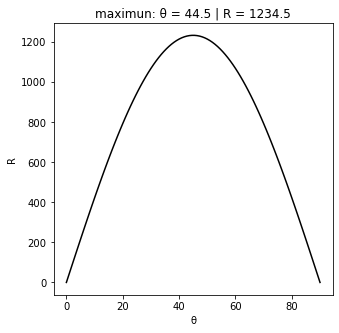

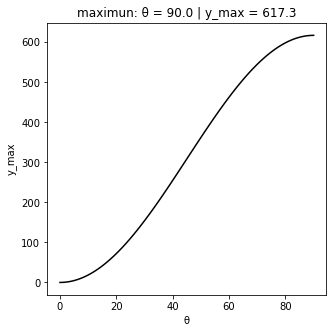

In [7]:
v0 = mortar_vo
num_t = 100
thetas = np.linspace(0,90,num_t)
Rs = []
ymaxs = []

for theta in thetas:
    R_exp = R(theta=theta, vo=v0)
    ymax_exp = ymax(theta=theta, vo=v0)
    Rs.append(R_exp)
    ymaxs.append(ymax_exp)
    
Rs = np.array(Rs)
ymaxs = np.array(ymaxs)

figsize = (5,5)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(thetas,Rs, color="k");
plt.xlabel('θ');
plt.ylabel('R');
i = np.argmax(Rs)
max_R = Rs[i]
msg = "maximun: θ = {:.1f} | R = {:.1f}".format(thetas[i], max_R)
plt.title(msg)

figsize = (5,5)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(thetas,ymaxs, color="k");
plt.xlabel('θ');
plt.ylabel('y_max');
i = np.argmax(ymaxs)
max_ymax = ymaxs[i]
msg = "maximun: θ = {:.1f} | y_max = {:.1f}".format(thetas[i], max_ymax)
plt.title(msg);

## 3) Given an object in $(x_1,y_1)$ can find the angle $\theta$ to hit it?


### We always can find the closest curve by brute force

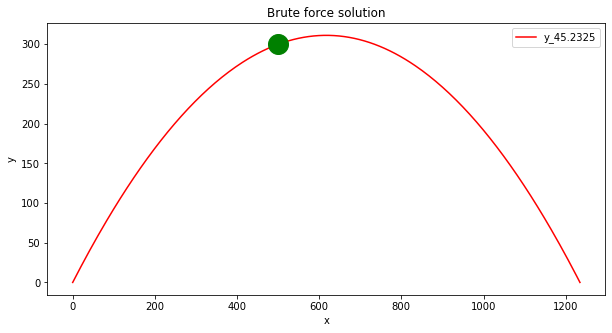

In [8]:
def bf_get_theta_xy(x1,y1,vo,search_space, num_t):
    thetas = np.linspace(1,90,search_space)
    exps = [run_exp(theta=theta, vo=vo, num_t=num_t) for theta in thetas]
    errs = []
    for df in exps:
        df.loc[:, "dist_xy"] = np.sqrt(np.power(df["x"] - x1,2) + np.power(df["y"] - y1,2))
        min_error = df.dist_xy.min()
        errs.append(min_error)

    i = np.argmin(errs)
    theta = np.round(thetas[i],4)
    err = np.round(errs[i],4)
    exp = exps[i]
    return theta, err, exp

x1,y1 = 500,300 
theta, err, exp = bf_get_theta_xy(x1=x1,y1=y1,vo=v0,search_space=500, num_t=300)

figsize=(10, 5)
fig, ax = plt.subplots(figsize=figsize)


suf = "_{}".format(theta)
exp.add_suffix(suf).set_index("x"+suf)[["y"+suf]].plot(ax=ax, color="r");
plt.plot([x1], [y1], marker="o", markersize=20, markeredgecolor="green", markerfacecolor="green")
plt.xlabel('x');
plt.ylabel('y');
msg = "Brute force solution"
plt.title(msg);

### Can we find an analytic solution?

For the tuple $(x_1, y_1)$ find values for $\theta$ such that:

$$ 
y_1 = (\tan \theta)x_1 - \frac{g}{2{v_o}^2 \cos^2 \theta}{x_1}^2
$$

or putting it in more simple form:


$$ 
M = \tan \theta - \frac{N}{\cos^2 \theta}
$$

where:

- $M =\frac{y_1}{x_1}$,

- $N =\frac{g x_1}{2{v_o}^2}$.


#### Formula simplification


$$ 
\sin \gamma - M \cos \gamma = L
$$

where:

- $\gamma =2\theta$,

- $L =2N+M$.

Using this equation and the fact that $1=\sin^2\gamma + \cos^2\gamma$ we get:

$$ 
(M^2+1)\cos^2\gamma + 2ML \cos\gamma + (L^2-1)=0
$$

Solving the equation above for $\cos\gamma$, we get:

- $a = (M^2+1)$,

- $b = 2ML$,

- $c = (L^2-1)$,

- $\Delta = b^2-4ac = 4M^2 - 4L^2 + 4$


$$
\cos \gamma = \frac{-2ML \pm \sqrt{\Delta}}{(2M^2+2)}.
$$

Hence, 

$$
\theta = 0.5 \arccos \left(\frac{-2ML \pm \sqrt{\Delta}}{(2M^2+2)}\right).
$$



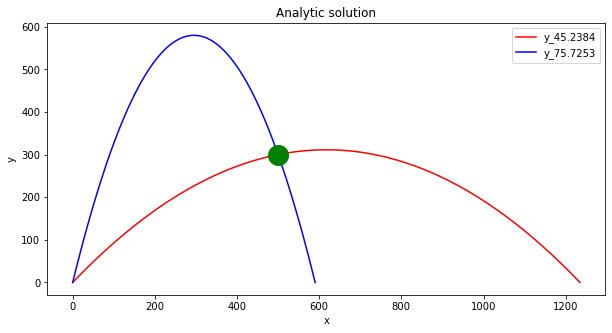

In [9]:
def an_get_theta_xy(x1,y1,vo):
    M = y1/x1
    N = (G*x1)/(2*np.power(v0,2))
    L = (2*N + M)
    a = (np.power(M,2) + 1)
    b = 2*M*L
    c = (np.power(L,2) - 1)
    delta = (np.power(b,2) - (4*a*c))
    sol1 = (-b + np.sqrt(delta))/(2*a)
    sol2 = (-b - np.sqrt(delta))/(2*a)
    theta1 = r2d(np.arccos(sol1))/2
    theta2 = r2d(np.arccos(sol2))/2
    return theta1, theta2, delta 

t1,t2,delta = an_get_theta_xy(x1=x1,y1=y1,vo=v0)

exp1 = run_exp(theta=t1, vo=v0, num_t=num_t)
exp2 = run_exp(theta=t2, vo=v0, num_t=num_t)

figsize=(10, 5)
fig, ax = plt.subplots(figsize=figsize)

suf = "_{:.4f}".format(t1)
exp1.add_suffix(suf).set_index("x"+suf)[["y"+suf]].plot(ax=ax, color="r");

suf = "_{:.4f}".format(t2)
exp2.add_suffix(suf).set_index("x"+suf)[["y"+suf]].plot(ax=ax, color="b");

plt.plot([x1], [y1], marker="o", markersize=20, markeredgecolor="g", markerfacecolor="green")
plt.xlabel('x');
plt.ylabel('y');
msg = "Analytic solution"
plt.title(msg);

## 4) Defining the area that we can intercept any target using ∆

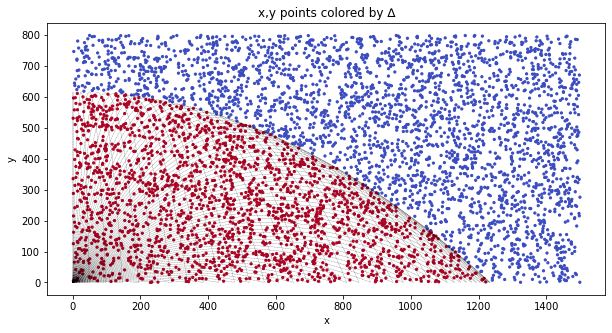

In [10]:
def to3(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

n_sim = 80
thetas = np.linspace(0,90,n_sim)
exps = [run_exp(theta=theta, vo=v0, num_t=num_t) for theta in thetas]

max_x = 1500
max_y = 800
n_points = 5000
n_range = 2*n_points
np.random.seed(seed=25)


obs = []
xs = np.linspace(0,max_x,n_range)
ys = np.linspace(0,max_y,n_range)
for _ in range(n_points):
    x1,y1 = np.random.choice(xs), np.random.choice(ys)
    _,_,delta = an_get_theta_xy(x1=x1,y1=y1,vo=v0)
    obs.append([x1,y1,delta])
    
df = pd.DataFrame(obs, columns=["x", "y", "delta"])

df.loc[:,"z"] = df.delta.map(to3)


figsize=(10, 5)
fig, ax = plt.subplots(figsize=figsize)
plt.scatter(df.x, df.y, s=5, c=df.z, cmap='coolwarm');
for theta,exp in zip(thetas,exps):
    suf = "_{:.0f}".format(theta)
    exp.add_suffix(suf).set_index("x"+suf)[["y"+suf]].plot(ax=ax,
                                                           color="k",
                                                           alpha=0.7,
                                                           linestyle="--",
                                                           linewidth=0.3);
ax.get_legend().remove()

plt.xlabel('x');
plt.ylabel('y');
msg = "x,y points colored by ∆"
plt.title(msg);